#Básico do Básico - Segmentação de imagens com limiarização (pt. 3)

##Importando as bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #para plotar as imagens
import matplotlib.image as mpimg #para importar as imagens
import skimage.io #também para plotar imagens
import numpy as np #para trabalhar com as imagens
import sys
from matplotlib import rcParams #mudar os parâmetros das imagens
from skimage.filters import threshold_otsu #função que faz limiarização
from skimage.color import rgb2gray #função que converte imagens em RGB para escala de cinzas
from skimage import exposure #exposição
from skimage.exposure import histogram #função de fazer histogramas do skimage
from skimage.transform import rescale #reescalar o histograma

##Limiarização comum

###Importando e plotando as imagens

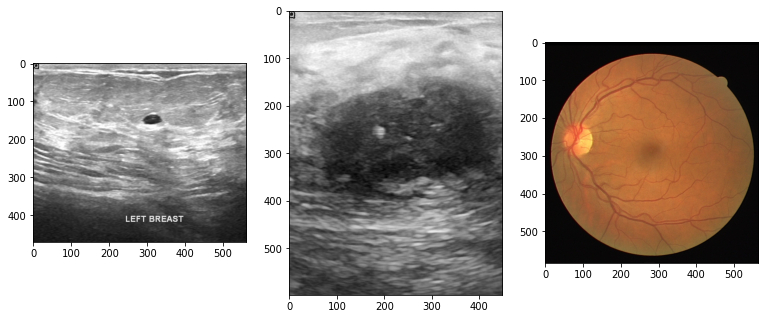

In [2]:
img_mama1 = mpimg.imread('benign (1).png')
img_mama2 = mpimg.imread('malignant (1).png')
img_retina = mpimg.imread('01_test.tif')

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_mama1)
ax[1].imshow(img_mama2)
ax[2].imshow(img_retina)

###Convertendo em escala de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [3]:
#Imagem do tumor benígno
img_mama1_gray = rgb2gray(img_mama1)
thresh1 = threshold_otsu(img_mama1_gray)
binary1 = img_mama1_gray > thresh1
print("Benígno: ", threshold_otsu(img_mama1_gray))

#Imagem do tumor malígno
img_mama2_gray = rgb2gray(img_mama2)
thresh2 = threshold_otsu(img_mama2_gray)
binary2 = img_mama2_gray > thresh2
print("Malígno: ", threshold_otsu(img_mama2_gray))

#Imagem de retina
img_retina_gray = rgb2gray(img_retina)
thresh3 = threshold_otsu(img_retina_gray)
binary3 = img_retina_gray > thresh3
print("Retina: ", threshold_otsu(img_retina_gray))

Benígno:  0.4628906
Malígno:  0.5136718
Retina:  0.23724137637867648


###Plotando a versão binarizada das imagens

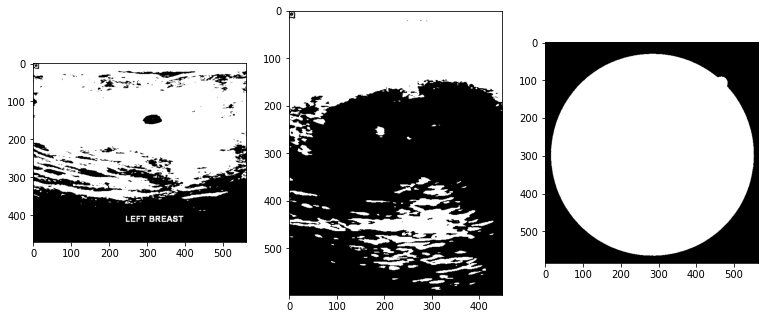

In [4]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(binary1, cmap='gray')
ax[1].imshow(binary2, cmap='gray')
ax[2].imshow(binary3, cmap='gray')

###Plotando as imagens em escala de cinzas e em seguida seus histogramas

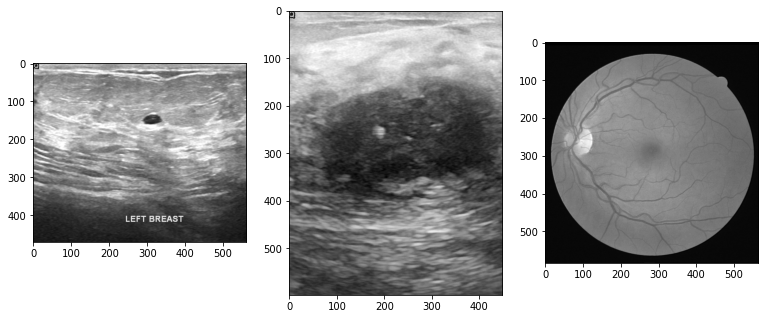

In [5]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_mama1_gray, cmap='gray')
ax[1].imshow(img_mama2_gray, cmap='gray')
ax[2].imshow(img_retina_gray, cmap='gray')

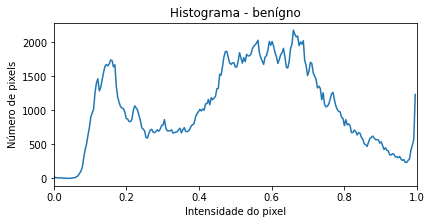

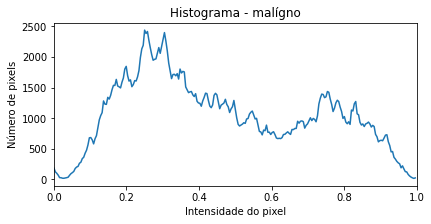

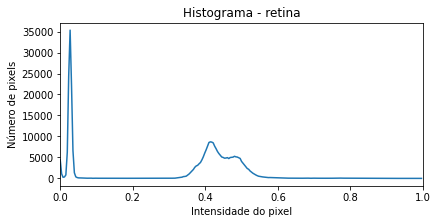

In [6]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram1, bin_edges = np.histogram(img_mama1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - benígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram1)

#Histograma do tumor malígno
histogram2, bin_edges = np.histogram(img_mama2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - malígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram2)

#Histograma de vasos da retina
histogram3, bin_edges = np.histogram(img_retina_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram3)

###Reescalando o histograma de retina normal

In [7]:
img_retina_gray_rescaled = np.where(img_retina_gray>0.45, img_retina_gray, 0) #tentei zerar em 0.2 e não houve melhora na imagem
print(img_retina_gray_rescaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


###Plotando o histograma de retina reescalado

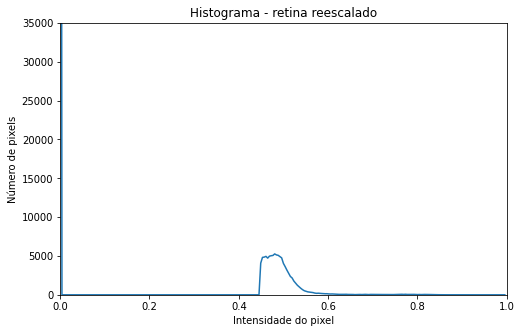

In [10]:
'''img_retina_gray_rescaled = exposure.rescale_intensity(img_retina_gray, in_range=(0.35, 1))
print(img_retina_gray_rescaled.shape)
#img_retina_gray_rescaled[img_retina_gray_rescaled<0.1] = 0'''
rcParams['figure.figsize'] = 6.5, 3

#Histograma de retina normal rescalado
histogram3_2, bin_edges = np.histogram(img_retina_gray_rescaled, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina reescalado")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
#plt.ylim([0, 35000])
plt.plot(bin_edges[0:-1], histogram3_2)

###Plotando nova limiarização da retina e retornando limiar de Otsu

Retina:  0.0017316888786764707


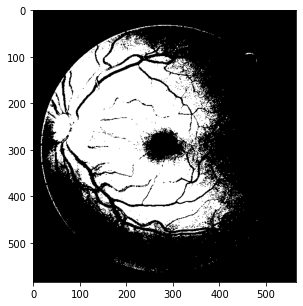

In [9]:
rcParams['figure.figsize'] = 8, 5
thresh1 = threshold_otsu(img_retina_gray_rescaled)
binary3_2 = img_retina_gray_rescaled > thresh1
print("Retina: ", threshold_otsu(img_retina_gray_rescaled))
imgplot = plt.imshow(binary3_2, cmap='gray')

##Limiarização com equalização

###Equalizando e plotando as imagens equalizadas e originais

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


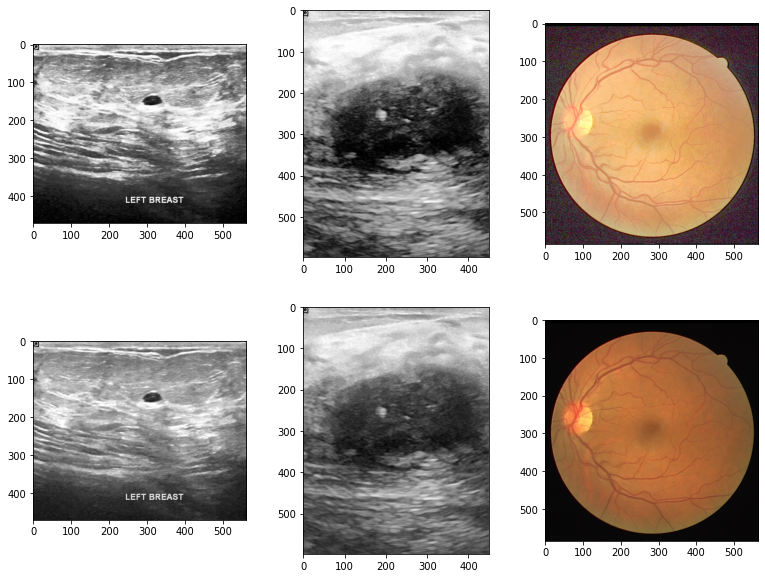

In [11]:
img_equalized_mama1 = exposure.equalize_hist(img_mama1)
img_equalized_mama2 = exposure.equalize_hist(img_mama2)
img_equalized_retina = exposure.equalize_hist(img_retina)

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img_equalized_mama1)
ax[1,0].imshow(img_mama1)
ax[0,1].imshow(img_equalized_mama2)
ax[1,1].imshow(img_mama2)
ax[0,2].imshow(img_equalized_retina)
ax[1,2].imshow(img_retina)

###Convertendo em escala de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [12]:
#Imagem do tumor benígno
img_equalized_mama1_gray = rgb2gray(img_equalized_mama1)
thresh4 = threshold_otsu(img_equalized_mama1_gray)
binary4 = img_equalized_mama1_gray > thresh4
print("Benígno: ", threshold_otsu(img_equalized_mama1_gray))

#Imagem do tumor malígno
img_equalized_mama2_gray = rgb2gray(img_equalized_mama2)
thresh5 = threshold_otsu(img_equalized_mama2_gray)
binary5 = img_equalized_mama2_gray > thresh5
print("Malígno: ", threshold_otsu(img_equalized_mama2_gray))

#Imagem de retina
img_equalized_retina_gray = rgb2gray(img_equalized_retina)
thresh6 = threshold_otsu(img_equalized_retina_gray)
binary6 = img_equalized_retina_gray > thresh6
print("Retina: ", threshold_otsu(img_equalized_retina_gray))

Benígno:  0.494199867622364
Malígno:  0.4983927246701142
Retina:  0.4319039906739012


###Plotando a limiarização equalizada e normal

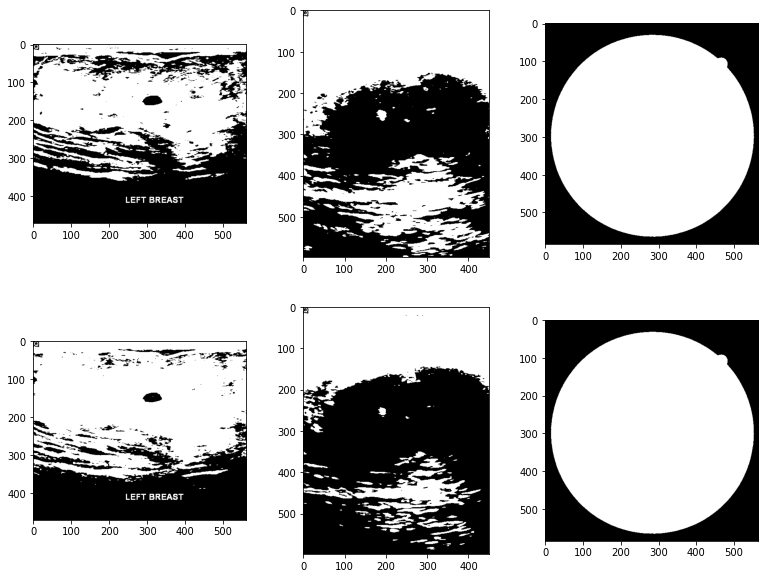

In [13]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary4, cmap='gray')
ax[1,0].imshow(binary1, cmap='gray')
ax[0,1].imshow(binary5, cmap='gray')
ax[1,1].imshow(binary2, cmap='gray')
ax[0,2].imshow(binary6, cmap='gray')
ax[1,2].imshow(binary3, cmap='gray')

###Plotando as imagens em escala de cinzas e em seguida seus histogramas

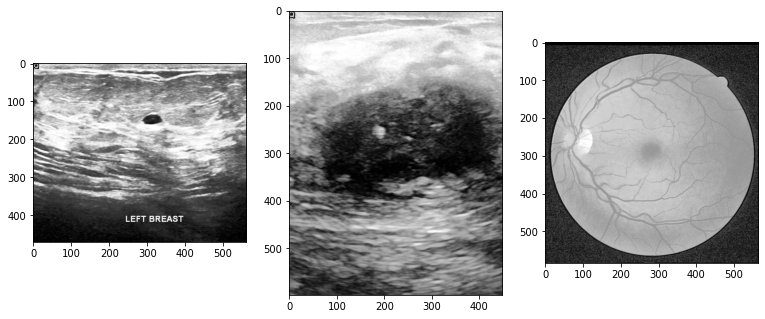

In [14]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_equalized_mama1_gray, cmap='gray')
ax[1].imshow(img_equalized_mama2_gray, cmap='gray')
ax[2].imshow(img_equalized_retina_gray, cmap='gray')

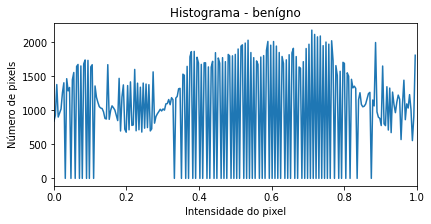

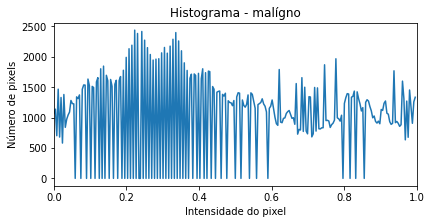

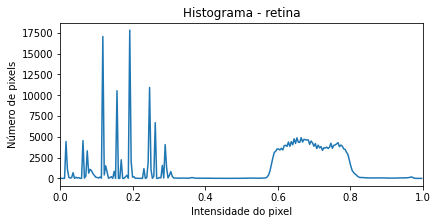

In [15]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram4, bin_edges = np.histogram(img_equalized_mama1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - benígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram4)

#Histograma do tumor malígno
histogram5, bin_edges = np.histogram(img_equalized_mama2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - malígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram5)

#Histograma de vasos da retina
histogram6, bin_edges = np.histogram(img_equalized_retina_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram6)

###Reescalando o histograma da retina equalizada

In [26]:
img_retina_gray_rescaled2 = np.where(img_equalized_retina_gray>0.65, img_equalized_retina_gray, 0) #tentei zerar em 0.5 e não houve melhora na imagem
print(img_retina_gray_rescaled2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


###Reescalando a intensidade do histograma de retina em em seguida plotando

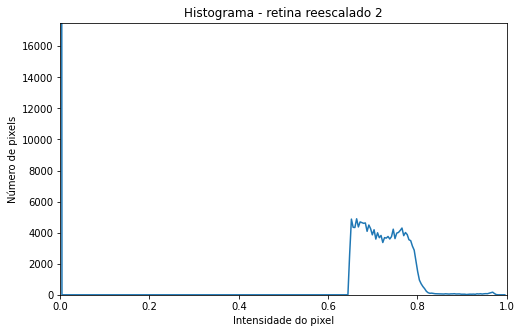

In [27]:
'''img_retina_gray_rescaled2 = exposure.rescale_intensity(img_equalized_retina_gray, in_range=(0.5, 1))'''

rcParams['figure.figsize'] = 6.5, 3

#Histograma de retina equalizada reescalado
histogram6_2, bin_edges = np.histogram(img_retina_gray_rescaled2, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina equalizado reescalado")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.ylim([0, 17500])
plt.plot(bin_edges[0:-1], histogram6_2)

###Plotando nova limiarização da retina e retornando seu novo limiar de Otsu

Retina:  0.0019120801329769771


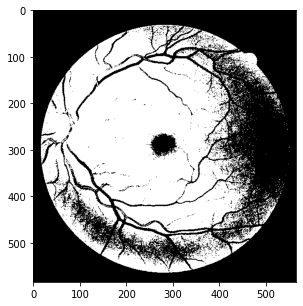

In [28]:
rcParams['figure.figsize'] = 8, 5
thresh1 = threshold_otsu(img_retina_gray_rescaled2)
binary6_2 = img_retina_gray_rescaled2 > thresh1
print("Retina: ", threshold_otsu(img_retina_gray_rescaled2))
imgplot = plt.imshow(binary6_2, cmap='gray')

##Limiarização CLAHE

###Equalização adaptativa e em seguida plotando as imagens CLAHE e originais

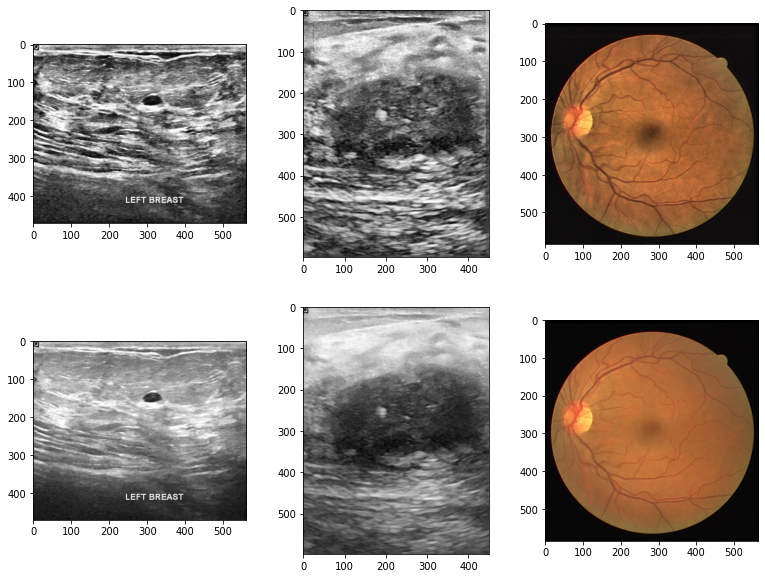

In [29]:
img_adpt_equalized_mama1 = exposure.equalize_adapthist(img_mama1)
img_adpt_equalized_mama2 = exposure.equalize_adapthist(img_mama2)
img_adpt_equalized_retina = exposure.equalize_adapthist(img_retina)

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img_adpt_equalized_mama1)
ax[1,0].imshow(img_mama1)
ax[0,1].imshow(img_adpt_equalized_mama2)
ax[1,1].imshow(img_mama2)
ax[0,2].imshow(img_adpt_equalized_retina)
ax[1,2].imshow(img_retina)

###Convertendo em escala de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu


In [30]:
#Imagem do tumor benígno
img_adpt_equalized_mama1_gray = rgb2gray(img_adpt_equalized_mama1)
thresh4 = threshold_otsu(img_adpt_equalized_mama1_gray)
binary7 = img_adpt_equalized_mama1_gray > thresh4
print("Benígno: ", threshold_otsu(img_adpt_equalized_mama1_gray))

#Imagem do tumor malígno
img_adpt_equalized_mama2_gray = rgb2gray(img_adpt_equalized_mama2)
thresh5 = threshold_otsu(img_adpt_equalized_mama2_gray)
binary8 = img_adpt_equalized_mama2_gray > thresh5
print("Malígno: ", threshold_otsu(img_adpt_equalized_mama2_gray))

#Imagem de retina
img_adpt_equalized_retina_gray = rgb2gray(img_adpt_equalized_retina)
thresh6 = threshold_otsu(img_adpt_equalized_retina_gray)
binary9 = img_adpt_equalized_retina_gray > thresh6
print("Retina: ", threshold_otsu(img_adpt_equalized_retina_gray))

Benígno:  0.49804685
Malígno:  0.49804685
Retina:  0.23989340637127604


###Plotando a CLAHE e a normal

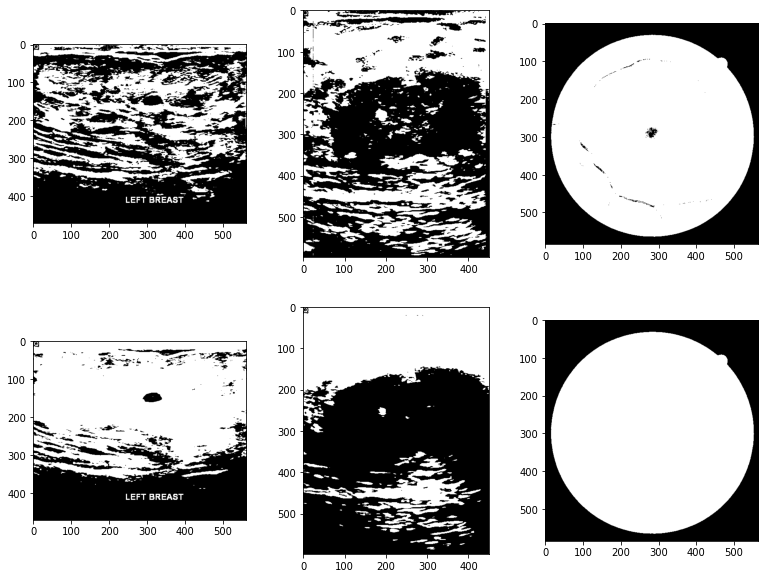

In [31]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary7, cmap='gray')
ax[1,0].imshow(binary1, cmap='gray')
ax[0,1].imshow(binary8, cmap='gray')
ax[1,1].imshow(binary2, cmap='gray')
ax[0,2].imshow(binary9, cmap='gray')
ax[1,2].imshow(binary3, cmap='gray')

###Plotando as imagens em escala de cinzas e seus histogramas

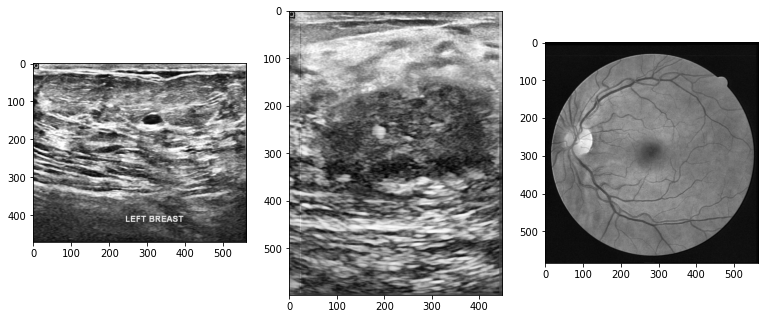

In [32]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_adpt_equalized_mama1_gray, cmap='gray')
ax[1].imshow(img_adpt_equalized_mama2_gray, cmap='gray')
ax[2].imshow(img_adpt_equalized_retina_gray, cmap='gray')

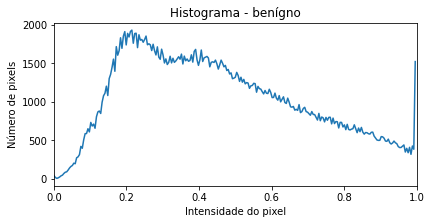

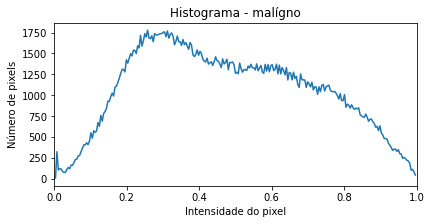

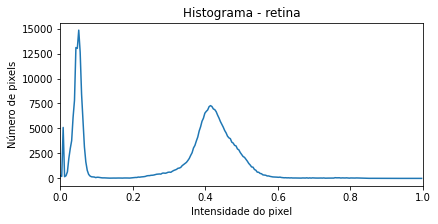

In [33]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma do tumor benígno
histogram7, bin_edges = np.histogram(img_adpt_equalized_mama1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - benígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram7)

#Histograma do tumor malígno
histogram8, bin_edges = np.histogram(img_adpt_equalized_mama2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - malígno")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram8)

#Histograma de vasos da retina
histogram9, bin_edges = np.histogram(img_adpt_equalized_retina_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram9)

###Reescalando a intensidade do histograma de retina em em seguida plotando

###Reescalando o histograma de retina CLAHE

In [41]:
img_retina_gray_rescaled3 = np.where(img_adpt_equalized_retina_gray>0.35, img_adpt_equalized_retina_gray, 0) #tentei zerar em 0.3 e não houve melhora na imagem
print(img_retina_gray_rescaled3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


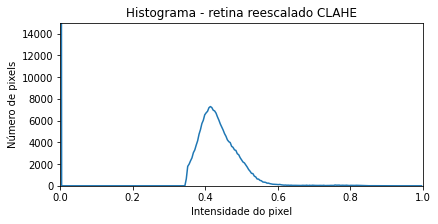

In [42]:
#img_retina_gray_rescaled3 = exposure.rescale_intensity(img_adpt_equalized_retina_gray)
'''img_retina_gray_rescaled3 = exposure.rescale_intensity(img_adpt_equalized_retina_gray, in_range=(0.15, 1))'''

rcParams['figure.figsize'] = 6.5, 3

#Histograma de retina CLAHE reescalado
histogram9_2, bin_edges = np.histogram(img_retina_gray_rescaled3, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma - retina reescalado CLAHE")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.ylim([0, 15000])
plt.plot(bin_edges[0:-1], histogram9_2)

###Plotando a nova limiarização da retina e retornando seu novo limiar

Retina:  0.0017258518443976694


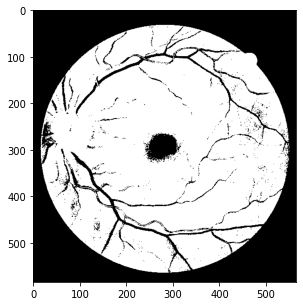

In [43]:
rcParams['figure.figsize'] = 8, 5
thresh1 = threshold_otsu(img_retina_gray_rescaled3)
binary9_2 = img_retina_gray_rescaled3 > thresh1
print("Retina: ", threshold_otsu(img_retina_gray_rescaled3))
imgplot = plt.imshow(binary9_2, cmap='gray')

##Intersection Over Union (IoU)

###Importando e plotando as mascaras

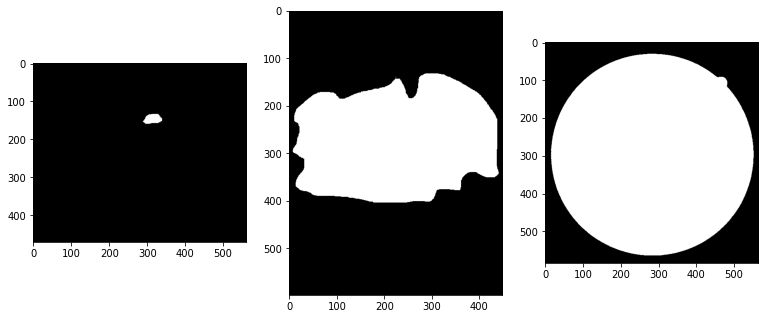

In [47]:
img_mama1_gd = mpimg.imread('benign (1)_mask.png')
img_mama2_gd = mpimg.imread('malignant (1)_mask.png')
img_retina_gd = mpimg.imread('01_test_mask.gif')

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_mama1_gd, cmap='gray')
ax[1].imshow(img_mama2_gd, cmap='gray')
ax[2].imshow(img_retina_gd, cmap='gray')

###Plotando todas as imagens binarizadas adquiridas

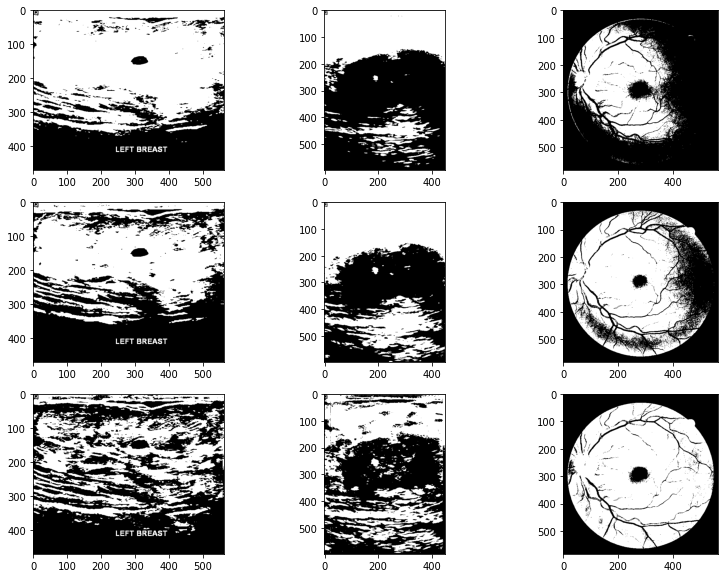

In [46]:
fig, ax = plt.subplots(3, 3)
ax[0,0].imshow(binary1, cmap='gray')
ax[0,1].imshow(binary2, cmap='gray')
ax[0,2].imshow(binary3_2, cmap='gray')
ax[1,0].imshow(binary4, cmap='gray')
ax[1,1].imshow(binary5, cmap='gray')
ax[1,2].imshow(binary6_2, cmap='gray')
ax[2,0].imshow(binary7, cmap='gray')
ax[2,1].imshow(binary8, cmap='gray')
ax[2,2].imshow(binary9_2, cmap='gray')

###Trocando o threshold de determinadas imagens e plotando-as

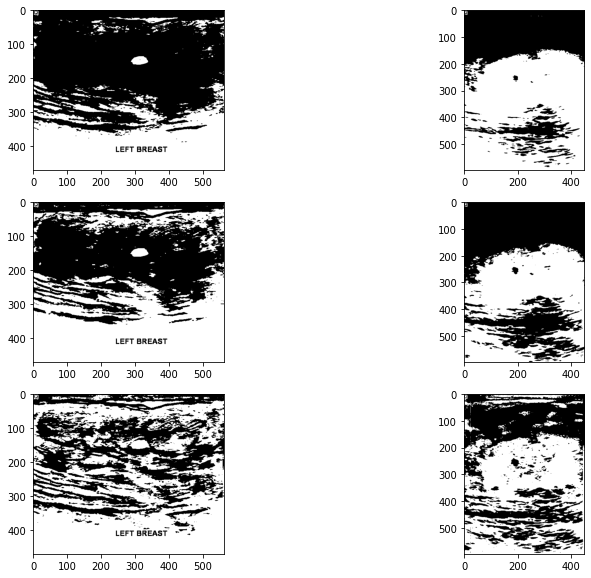

In [61]:
img_mama1_gray = rgb2gray(img_mama1)
thresh1 = threshold_otsu(img_mama1_gray)
binary1 = img_mama1_gray <= thresh1

img_mama2_gray = rgb2gray(img_mama2)
thresh2 = threshold_otsu(img_mama2_gray)
binary2 = img_mama2_gray <= thresh2

img_equalized_mama1_gray = rgb2gray(img_equalized_mama1)
thresh4 = threshold_otsu(img_equalized_mama1_gray)
binary4 = img_equalized_mama1_gray <= thresh4

img_equalized_mama2_gray = rgb2gray(img_equalized_mama2)
thresh5 = threshold_otsu(img_equalized_mama2_gray)
binary5 = img_equalized_mama2_gray <= thresh5

img_adpt_equalized_mama1_gray = rgb2gray(img_adpt_equalized_mama1)
thresh4 = threshold_otsu(img_adpt_equalized_mama1_gray)
binary7 = img_adpt_equalized_mama1_gray <= thresh4

img_adpt_equalized_mama2_gray = rgb2gray(img_adpt_equalized_mama2)
thresh5 = threshold_otsu(img_adpt_equalized_mama2_gray)
binary8 = img_adpt_equalized_mama2_gray <= thresh5

rcParams['figure.figsize'] = 13, 10
fig, ax = plt.subplots(3, 2)
ax[0,0].imshow(binary1, cmap='gray')
ax[0,1].imshow(binary2, cmap='gray')
ax[1,0].imshow(binary4, cmap='gray')
ax[1,1].imshow(binary5, cmap='gray')
ax[2,0].imshow(binary7, cmap='gray')
ax[2,1].imshow(binary8, cmap='gray')